#Module

In [25]:
from Bio import SeqIO
import pandas as pd
import numpy as np
from collections import Counter
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [26]:
df = pd.read_excel("../Dataset/Dataset_Preprocess.xlsx")
df

,urutan,kelas
0,AGTTGTTAGTCTACGTGGACCGACAAAGACAGATTCTTTGAGGGAG...,0
1,AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAG...,0
2,GTGGACCGCAAAGAACAGTTTCGAATCGGAAGCTTGCTTAACGTAG...,0
3,TTTCATTTTACCACACGTAACGGAGAACCACACATGATCGTCGGTA...,0
4,ATGAATAACCAACGAAAAAATGCGAGAAAAACGCCTTTCAATATGC...,0
...,...,...
1251,ATGAATAACCAACGGAAAAAGGCGAAAAACACGCCTTTCAATATGC...,1
1252,ATGAATAACCAACGGAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1
1253,ATGAACAACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1
1254,ATGAATAACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1


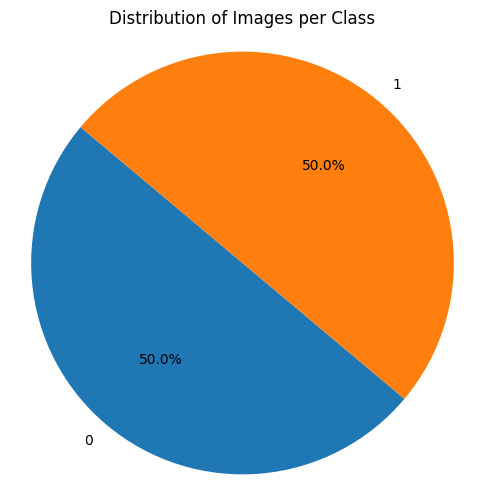

In [27]:
# Count the number of instances per class
class_counts = df['kelas'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images per Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [28]:
# Fungsi untuk menghasilkan K-mers dengan panjang 3 dari urutan DNA
def get_kmers(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

# Fungsi untuk membuat mapping manual dari K-mers ke angka
def create_kmer_mapping(kmers_list):
    unique_kmers = set([kmer for kmers in kmers_list for kmer in kmers])
    kmer_to_index = {kmer: idx + 1 for idx, kmer in enumerate(unique_kmers)}
    return kmer_to_index

# Fungsi untuk mengonversi K-mers ke angka berdasarkan mapping
def map_kmers_to_indices(kmers, kmer_mapping):
    return [kmer_mapping[kmer] for kmer in kmers]

In [29]:
df['kmers'] = df['urutan'].apply(lambda x: get_kmers(x, 3))


kmer_mapping = create_kmer_mapping(df['kmers'])
print(f"Mapping dari K-mers ke angka: {kmer_mapping}")


df['encoded_kmers'] = df['kmers'].apply(lambda x: map_kmers_to_indices(x, kmer_mapping))


X = pad_sequences(df['encoded_kmers'].tolist(), padding='post')


y = df['kelas'].values


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Mapping dari K-mers ke angka: {'GAG': 1, 'AAC': 2, 'TGG': 3, 'TCA': 4, 'CGA': 5, 'GAA': 6, 'CCG': 7, 'ACG': 8, 'ATT': 9, 'CGC': 10, 'TAT': 11, 'AGG': 12, 'TTA': 13, 'CCA': 14, 'CTG': 15, 'CAG': 16, 'GGT': 17, 'GTA': 18, 'GGA': 19, 'CGT': 20, 'AGT': 21, 'GCC': 22, 'ACT': 23, 'TAG': 24, 'GAC': 25, 'CAA': 26, 'ACA': 27, 'AGA': 28, 'TCC': 29, 'CAT': 30, 'GCG': 31, 'TTG': 32, 'TAA': 33, 'GTT': 34, 'CCC': 35, 'ATG': 36, 'CAC': 37, 'CGG': 38, 'ATA': 39, 'AAG': 40, 'TGT': 41, 'CTT': 42, 'CTC': 43, 'CCT': 44, 'TGC': 45, 'TAC': 46, 'GAT': 47, 'CTA': 48, 'AAT': 49, 'TCG': 50, 'ACC': 51, 'TCT': 52, 'TTC': 53, 'TGA': 54, 'ATC': 55, 'GTC': 56, 'AAA': 57, 'GTG': 58, 'GGC': 59, 'GCT': 60, 'AGC': 61, 'GCA': 62, 'TTT': 63, 'GGG': 64}
Shape of X: (1256, 12119)
Shape of y: (1256,)


In [30]:
df

,urutan,kelas,kmers,encoded_kmers
0,AGTTGTTAGTCTACGTGGACCGACAAAGACAGATTCTTTGAGGGAG...,0,"[AGT, GTT, TTG, TGT, GTT, TTA, TAG, AGT, GTC, ...","[21, 34, 32, 41, 34, 13, 24, 21, 56, 52, 48, 4..."
1,AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAG...,0,"[AGT, GTT, TTG, TGT, GTT, TTA, TAG, AGT, GTC, ...","[21, 34, 32, 41, 34, 13, 24, 21, 56, 52, 48, 4..."
2,GTGGACCGCAAAGAACAGTTTCGAATCGGAAGCTTGCTTAACGTAG...,0,"[GTG, TGG, GGA, GAC, ACC, CCG, CGC, GCA, CAA, ...","[58, 3, 19, 25, 51, 7, 10, 62, 26, 57, 40, 28,..."
3,TTTCATTTTACCACACGTAACGGAGAACCACACATGATCGTCGGTA...,0,"[TTT, TTC, TCA, CAT, ATT, TTT, TTT, TTA, TAC, ...","[63, 53, 4, 30, 9, 63, 63, 13, 46, 51, 14, 37,..."
4,ATGAATAACCAACGAAAAAATGCGAGAAAAACGCCTTTCAATATGC...,0,"[ATG, TGA, GAA, AAT, ATA, TAA, AAC, ACC, CCA, ...","[36, 54, 6, 49, 39, 33, 2, 51, 14, 26, 2, 8, 5..."
...,...,...,...,...
1251,ATGAATAACCAACGGAAAAAGGCGAAAAACACGCCTTTCAATATGC...,1,"[ATG, TGA, GAA, AAT, ATA, TAA, AAC, ACC, CCA, ...","[36, 54, 6, 49, 39, 33, 2, 51, 14, 26, 2, 8, 3..."
1252,ATGAATAACCAACGGAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1,"[ATG, TGA, GAA, AAT, ATA, TAA, AAC, ACC, CCA, ...","[36, 54, 6, 49, 39, 33, 2, 51, 14, 26, 2, 8, 3..."
1253,ATGAACAACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1,"[ATG, TGA, GAA, AAC, ACA, CAA, AAC, ACC, CCA, ...","[36, 54, 6, 2, 27, 26, 2, 51, 14, 26, 2, 8, 5,..."
1254,ATGAATAACCAACGAAAAAAGGCGAGAAGTACGCCTTTCAATATGC...,1,"[ATG, TGA, GAA, AAT, ATA, TAA, AAC, ACC, CCA, ...","[36, 54, 6, 49, 39, 33, 2, 51, 14, 26, 2, 8, 5..."


In [20]:
len_seq = 145
X = X[:, :len_seq]

In [21]:
np.set_printoptions(threshold=np.inf)

In [23]:
X[0]

array([21, 34, 32, 41, 34, 13, 24, 21, 56, 52, 48, 46,  8, 20, 58,  3, 19,
       25, 51,  7,  5, 25, 27, 26, 57, 40, 28, 25, 27, 16, 28, 47,  9, 53,
       52, 42, 63, 32, 54,  1, 12, 64, 19,  1, 61, 60, 48, 33, 40, 61, 60,
       43,  4, 26, 49, 36, 41, 18, 24, 21, 34, 53, 52, 48, 33,  2, 27, 16,
       21, 34, 63, 63, 63, 63, 13, 33, 49,  9, 13, 24, 28,  1, 28,  1, 61,
       62, 16, 28, 47, 55, 52, 43, 52, 15, 54, 47, 36, 54,  6, 49, 39, 33,
        2, 51, 14, 26,  2,  8, 38, 19,  6, 57, 57, 57, 40, 12, 59, 31,  5,
        6, 57, 57, 57,  2, 27, 37,  8, 10, 22, 44, 42, 63, 53,  4, 26, 49,
       39, 11, 36, 45, 60, 15, 54,  6, 57])

In [24]:
len(X[0])

145

In [14]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1256, 145)
Shape of y: (1256,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from GCallbacks import PlotLosses, checkpoint_callback, TimeHistory, PlotTimes

# Inisialisasi callback
plot_losses_callback = PlotLosses()
time_callback = TimeHistory()
plot_times_callback = PlotTimes(time_callback)
call = [plot_losses_callback, time_callback, plot_times_callback, checkpoint_callback]

In [10]:
optimizer = Adam(learning_rate=0.01)

model = Sequential()
model.add(Embedding(input_dim=len(kmer_mapping), output_dim=64, input_length=X.shape[1]))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [11]:
# Melatih model
history = model.fit(X_train, y_train, epochs=70, batch_size=32, validation_data=(X_test, y_test), callbacks=call)

Epoch 1/70
32/32 [==============================] - 6s 41ms/step - loss: 0.4151 - accuracy: 0.7729 - val_loss: 0.2595 - val_accuracy: 0.8571
Epoch 2/70
32/32 [==============================] - 1s 24ms/step - loss: 0.2068 - accuracy: 0.9014 - val_loss: 0.1858 - val_accuracy: 0.9127
Epoch 3/70
32/32 [==============================] - 1s 26ms/step - loss: 0.2107 - accuracy: 0.9084 - val_loss: 0.2603 - val_accuracy: 0.9087
Epoch 4/70
32/32 [==============================] - 1s 25ms/step - loss: 0.1672 - accuracy: 0.9233 - val_loss: 0.1271 - val_accuracy: 0.9365
Epoch 5/70
32/32 [==============================] - 1s 25ms/step - loss: 0.1120 - accuracy: 0.9522 - val_loss: 0.0976 - val_accuracy: 0.9563
Epoch 6/70
32/32 [==============================] - 1s 32ms/step - loss: 0.2219 - accuracy: 0.9054 - val_loss: 0.2049 - val_accuracy: 0.9008
Epoch 7/70
32/32 [==============================] - 1s 26ms/step - loss: 0.1346 - accuracy: 0.9402 - val_loss: 0.1286 - val_accuracy: 0.9325
Epoch 8/70
32

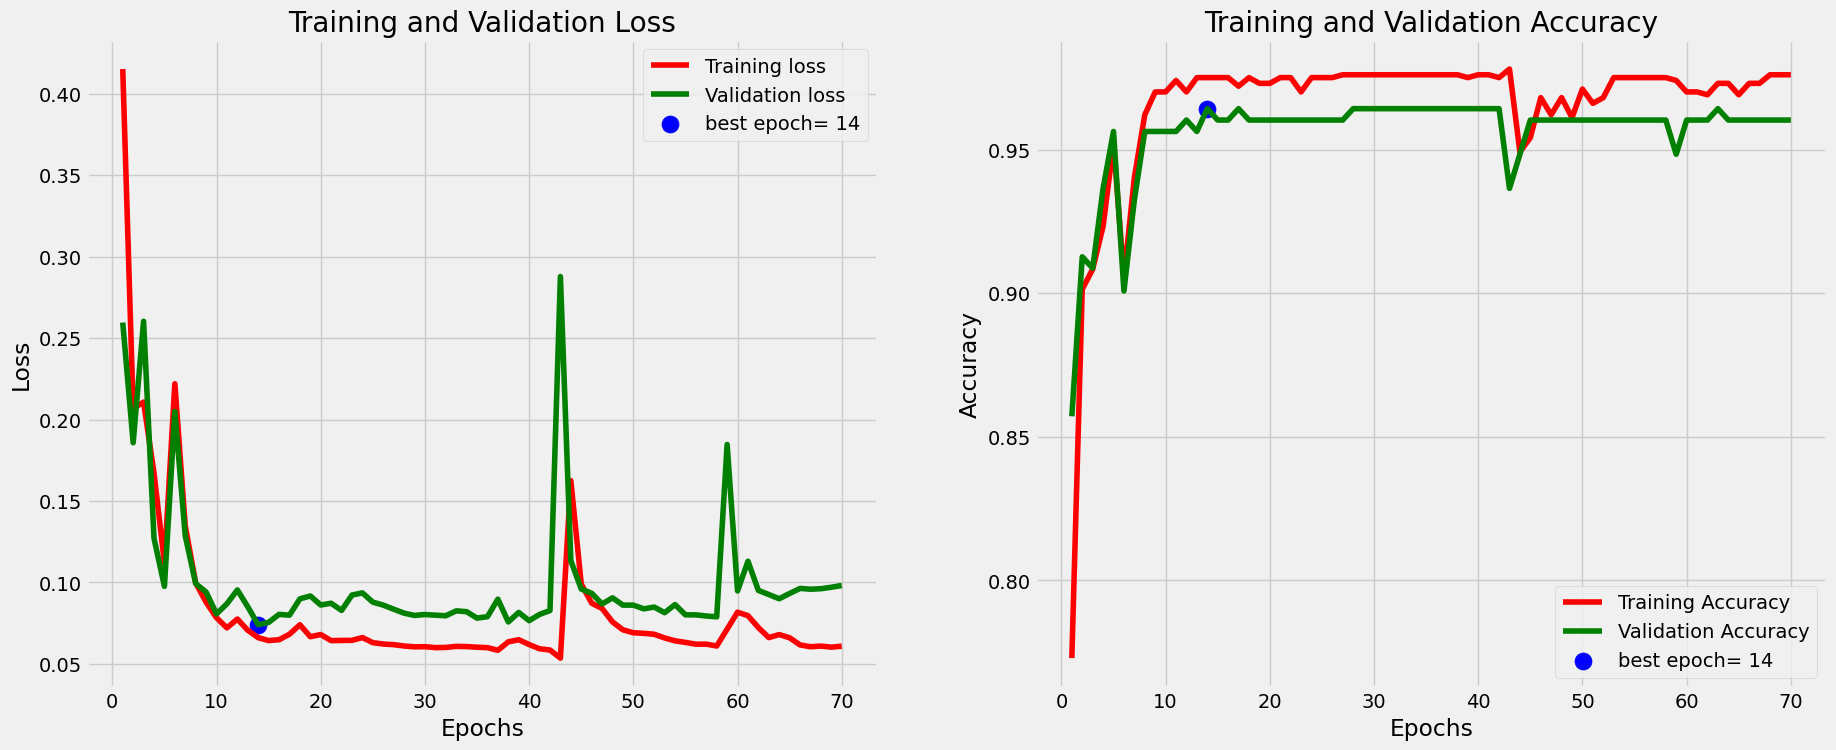

In [12]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [13]:
# Muat bobot dari file HDF5
model.load_weights('Checkpoints/model_epoch_14.h5')

In [14]:
y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

8/8 [==============================] - 0s 11ms/step
Accuracy: 0.96
Precision: 0.93
Recall: 1.00
F1-Score: 0.96


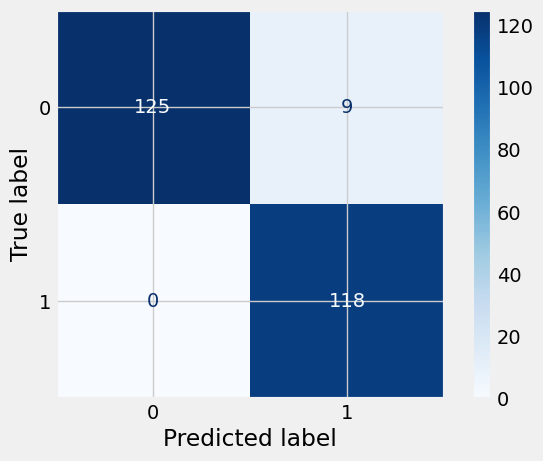

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()